In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

<class 'numpy.ndarray'>
255
(28, 28)
<class 'numpy.uint8'>


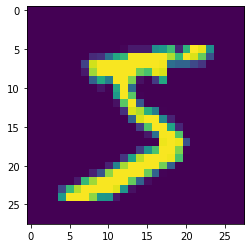

In [7]:
img = x_train[0]
print(type(img))
print(np.amax(img))
print(img.shape)
print(type(img[12, 13]))
plt.imshow(img)

In [8]:
x_train = x_train/255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = x_test/255.0
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
NOISE = 0.5
x_train_noise = x_train + NOISE*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noise = x_test + NOISE*np.random.normal(loc=0.0, scale=1.0, size = x_test.shape)

x_train_noise = np.clip(x_train_noise, 0., 1)
x_test_noise = np.clip(x_test_noise, 0., 1)

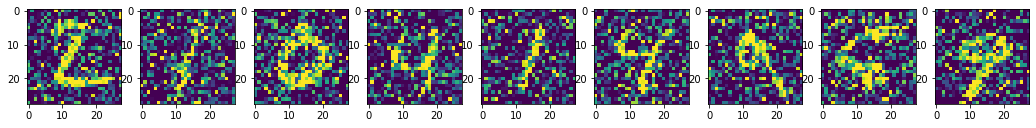

In [10]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noise[i].reshape(28, 28))
plt.show()

In [11]:
INPUT_SHAPE = (28,28,1)

def build_encoder():
    model = Sequential()
    model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=INPUT_SHAPE))
    model.add(MaxPooling2D())
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(Conv2D(8, 2, padding='same', activation='relu'))


    return model

encoder = build_encoder()
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        9232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           520       
Total params: 12,712
Trainable params: 12,712
Non-trainable params: 0
____________________________________________________

In [12]:
LATENT_SHAPE = (7,7,8)
def build_decoder():
    model = Sequential()
    model.add(Conv2D(8,3, padding='same', activation='relu',input_shape=LATENT_SHAPE ))
    model.add(UpSampling2D())
    model.add(Conv2D(16,3, activation='relu', padding='same'))
    model.add(Conv2D(16,3, padding='same'))
    model.add(UpSampling2D())
    model.add(Conv2D(64,3, activation='relu', padding='same'))
    model.add(Conv2D(1, 3,activation='relu',  padding='same'))

    return model

decoder = build_decoder()
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        9280      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 1)        

In [13]:
def build_autoencoder(encoder, decoder):
    model = Sequential()
    model.add(encoder)
    model.add(decoder)

    return model

autoencoder = build_autoencoder(encoder, decoder)
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 7, 7, 8)           12712     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         13929     
Total params: 26,641
Trainable params: 26,641
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

In [15]:
autoencoder.fit(x_train_noise, x_train, epochs=20, batch_size=256, shuffle=True, 
          validation_data=(x_test_noise, x_test))

Epoch 1/20
235/235 [==============================] - 6s 16ms/step - loss: 0.0340 - val_loss: 0.0187
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0174 - val_loss: 0.0158
Epoch 3/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0155 - val_loss: 0.0147
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 5/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0133 - val_loss: 0.0131
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0130 - val_loss: 0.0127
Epoch 8/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 9/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 10/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0123 - val_lo

In [16]:
denoised_img_sample = autoencoder.predict(x_test_noise[:10])

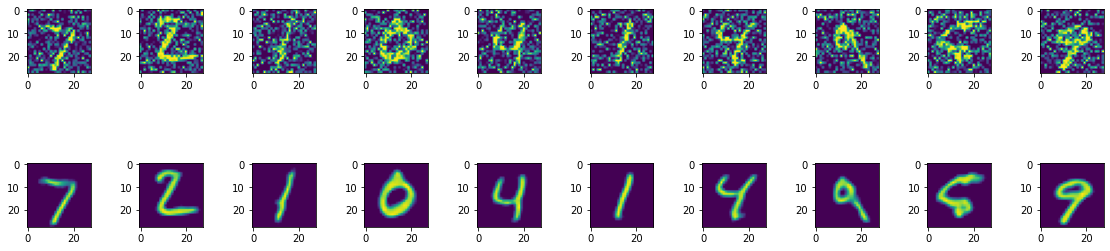

In [17]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40+i+ 1)
    plt.imshow(denoised_img_sample[i].reshape(28, 28))

plt.show()
